# 机器学习工程师纳米学位
## 深度学习
## 项目：搭建一个数字识别项目

在此文件中，我们提供给你了一个模板，以便于你根据项目的要求一步步实现要求的功能，进而完成整个项目。如果你认为需要导入另外的一些代码，请确保你正确导入了他们，并且包含在你的提交文件中。以**'练习'**开始的标题表示接下来你将开始实现你的项目。注意有一些练习是可选的，并且用**'可选'**标记出来了。

在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以'练习'开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**注意：** Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 连接 mnist 的字符来合成数据

你可以通过连接[MNIST](http://yann.lecun.com/exdb/mnist/)的字符来合成数据来训练这个模型。为了快速导入数据集，我们可以使用 [Keras Datasets](https://keras.io/datasets/#mnist-database-of-handwritten-digits) [中文文档](http://keras-cn.readthedocs.io/en/latest/other/datasets/#mnist)。

### 载入 mnist

In [1]:
from keras.datasets import mnist

(X_raw, y_raw), (X_raw_test, y_raw_test) = mnist.load_data()

n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]

Using TensorFlow backend.


### 设置随机seed

In [2]:
seed_0=0
seed_1=1
seed_2=2
seed_3=3
seed_4=4
seed_5=5
seed_6=6

### 可视化 mnist

我们可以通过 matplotlib 来可视化我们的原始数据集。

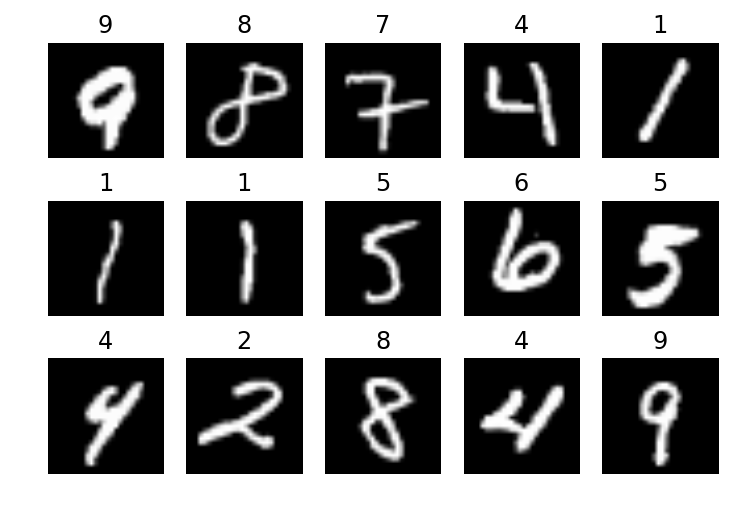

In [3]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

for i in range(15):
    plt.subplot(3, 5, i+1)
    index = random.randint(0, n_train-1)
    plt.title(str(y_raw[index]))
    plt.imshow(X_raw[index], cmap='gray')
    plt.axis('off')

### 练习：合成数据

你需要随机取随机张图片，然后将它们拼接成新的图片。

你需要设置20%的数据作为验证集，以保证模型没有过拟合。

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import random
import keras

n_class, n_len, width, height = 11, 5, 28, 28


# dict_map={}
# for ii in range(n_class):
#     t=np.zeros(n_class, dtype=np.uint8)
#     t[ii]=1
#     dict_map[ii]=t


def generate_dataset(X, y):
    X_len = X.shape[0]    
    
    X_gen = np.zeros((X_len, height, width*n_len, 1), dtype=np.uint8)
    y_gen = [np.zeros((X_len, n_class), dtype=np.uint8) for i in range(n_len)]
    # TODO: 随机取1~5个数字，并拼接成新的图片
    # 1. 生成X_len个在1-5范围内的数 len_list
    random.seed(seed_0)
    len_list=np.array([random.randint(1,5) for i in range(X_len)])
    # 2. 使用5个不同的seed，生成5组随机数(最小值为0，最大值为X_len-1，间隔为1)，最后的结果就是生成一组将X序号随机打乱的随机数
    order_1,order_2,order_3,order_4,order_5=range(X_len),range(X_len),range(X_len),range(X_len),range(X_len)
    random.Random(seed_1).shuffle(order_1)
    random.Random(seed_2).shuffle(order_2)
    random.Random(seed_3).shuffle(order_3)
    random.Random(seed_4).shuffle(order_4)
    random.Random(seed_5).shuffle(order_5)    
    # 4. 将X、y按照随机序列order重新排列
    X_1=np.array(X[order_1])
    X_2=np.array(X[order_2])
    X_3=np.array(X[order_3])
    X_4=np.array(X[order_4])
    X_5=np.array(X[order_5])

    y_1=np.array(y[order_1]).reshape(-1,1)
    y_2=np.array(y[order_2]).reshape(-1,1)
    y_3=np.array(y[order_3]).reshape(-1,1)
    y_4=np.array(y[order_4]).reshape(-1,1)
    y_5=np.array(y[order_5]).reshape(-1,1)
    # 5. 根据len_list，将无数字区域的X设为0，y设为10
    X_5[len_list<5]=0
    X_4[len_list<4]=0
    X_3[len_list<3]=0
    X_2[len_list<2]=0

    y_5[len_list<5]=10
    y_4[len_list<4]=10
    y_3[len_list<3]=10
    y_2[len_list<2]=10
    # 6. 将5个数字x及其标记y合成一个
    X_=np.concatenate((X_1,X_2,X_3,X_4,X_5),axis=2)
    y_=np.concatenate((y_1,y_2,y_3,y_4,y_5),axis=1)
    y_=np.swapaxes(y_,0,1)

    # 7. 生成X_gen
    X_gen=X_.reshape(X_.shape[0],X_.shape[1],X_.shape[2],1)

    # 8. 生成y_gen    
#     y_gen=(pd.DataFrame(np.swapaxes(y_,0,1)).applymap(lambda x: dict_map[x])).values.tolist()
    y_gen=[keras.utils.to_categorical(i,num_classes=n_class) for i in y_]    
                
    return X_gen, y_gen

X_raw_train, X_raw_valid, y_raw_train, y_raw_valid = train_test_split(X_raw, y_raw, test_size=0.2, random_state=seed_6)
X_train, y_train = generate_dataset(X_raw_train, y_raw_train)
X_valid, y_valid = generate_dataset(X_raw_valid, y_raw_valid)
X_test, y_test = generate_dataset(X_raw_test, y_raw_test)

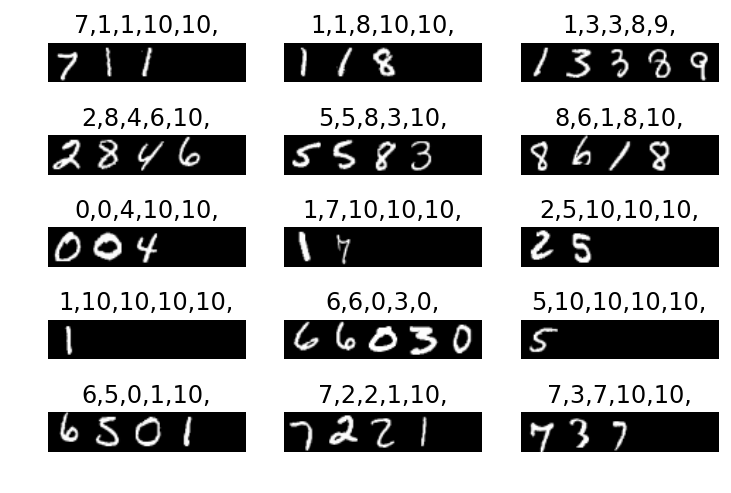

In [8]:
# 显示生成的图片
random.seed(1)
for i in range(15):
    plt.subplot(5, 3, i+1)
    index = random.randint(0, n_test-1)
    title = ''    
    for j in range(n_len):
        title += str(np.argmax(y_test[j][index])) + ','

    plt.title(title)
    plt.imshow(X_test[index][:,:,0], cmap='gray')
    plt.axis('off')

### 问题 1
_你是如何合成数据集的？，为什么要分训练集，验证集和测试集？_

**回答：**
### 合成数据集的方法：
#####  1. 变量定义：
- 字符共有n_class类；
- 合成前的数据集X共有X_len张字符图片,数据形状为（X_len, height ,weight），每张字符图片为单通道，宽weight，高height;
- 合成前的标记y数据形状为（X_len,）
- 合成后的数据集X_gen共有X_len张字符串图片，数据形状为(X_len, height, width*n_len, 1)；每张字符串图片为单通道，宽weight*n_len，高height，由1~n_len不等张字符图片及空白组成，；
- 合成后的标记y_gen数据形状为(n_len,X_len,n_class)

#####  2. 生成随机一维随机数组len_list
- 数组len_list中每个元素代表合成后的数据集X_gen中每张字符串照片由多少张字符图片及空白拼成
- 数字取值范围为1~n_len
- 数组长度为X_len；

#####  3. 生成n_len组不同的随机序列order_1,...,order_n_len
- 使用n_len个不同的随机种子，将5组数(最小值为0，最大值为X_len-1，间隔为1)进行随机打乱
- 每个随机序列的长度为X_len

##### 4. 使用上一步生成的n_len个随机序列对n_len个合成前数据集X,标记y进行重新排列，排列后为X_i，y_i(i从0到n_len-1)

##### 5. 使用一维随机数组len_list对上一步生成的X_i，y_i(i从0到n_len-1)进行操作
- 操作后的结果就是，如果len_list在第k个位置上数字为j，那么相应的X_i(i小于j时)在第k个位置上的图片将会被设为空白（全部为0），y_i(i小于j时)在第k个位置上的图片将会被设为n_class

##### 6. 将X_i，y_i(i从0到n_len-1)沿着最后一根轴进行拼接，合成X_,y_
- 合成后的X_数据形状为(X_len, height, width*n_len)
- 合成后的y_数据形状为(X_len, n_len)，交换轴后为(n_len，X_len)

##### 7. X_通过形状变换，生成X_gen

##### 8. 将y_中每个元素i转换为长度  n_class的数组（除了第i个元素为1外其他均为0）
                

### 分为训练集，验证集和测试集的原因：
- 训练集：用来训练模型
- 测试集：用来测试模型的泛化能力
- 验证集：在使用训练集对模型进行训练过程中，可以使用验证集及时检验模型的泛化能力，避免模型的过拟合

### 练习：设计并测试一个模型架构

设计并实现一个能够识别数字序列的深度学习模型。为了产生用于测试的合成数字序列，你可以进行如下的设置：比如，你可以限制一个数据序列最多五个数字，并在你的深度网络上使用五个分类器。同时，你有必要准备一个额外的“空白”的字符，以处理相对较短的数字序列。

在思考这个问题的时候有很多方面可以考虑：

- 你的模型可以基于深度神经网络或者是卷积神经网络。
- 你可以尝试是否在每个分类器间共享权值。
- 你还可以在深度神经网络中使用循环网络来替换其中的分类层，并且将数字序列里的数字一个一个地输出。

在使用 Keras 搭建模型的时候，你可以使用 [泛型模型](http://keras-cn.readthedocs.io/en/latest/models/model/) 的方式来搭建多输出模型。

In [49]:
from keras.models import Model

from keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


# TODO: 构建你的模型
def create_digit_recognition_model():

    main_input = Input(shape=(height, width*n_len, 1), name='main_input')
    x=Conv2D(32, (3, 3), activation='relu',name='Conv_1')(main_input)
    x=Conv2D(32, (3, 3), activation='relu',name='Conv_2')(x)
    x=MaxPooling2D(pool_size=(2, 2),name='Pool_1')(x)
    x=Dropout(0.25,name='Dropout_1')(x)

    x=Conv2D(64, (3, 3), activation='relu',name='Conv_3')(x)
    x=Conv2D(64, (3, 3), activation='relu',name='Conv_4')(x)
    x=MaxPooling2D(pool_size=(2, 2),name='Pool_2')(x)
    x=Dropout(0.25,name='Dropout_2')(x)

    x=Flatten(name='Flatten')(x)
    shared_x=Dense(256, activation='relu',name='SharedDense')(x)

    y1=Dropout(0.25,name='Dropout_3')(shared_x)
    y1=Dense(11, activation='softmax',name='y1')(y1)

    y2=Dropout(0.25,name='Dropout_4')(shared_x)
    y2=Dense(11, activation='softmax',name='y2')(y2)

    y3=Dropout(0.25,name='Dropout_5')(shared_x)
    y3=Dense(11, activation='softmax',name='y3')(y3)

    y4=Dropout(0.25,name='Dropout_6')(shared_x)
    y4=Dense(11, activation='softmax',name='y4')(y4)

    y5=Dropout(0.25,name='Dropout_7')(shared_x)
    y5=Dense(11, activation='softmax',name='y5')(y5)

    digit_model=Model(inputs=main_input,outputs=[y1,y2,y3,y4,y5])

    digit_model.compile(loss={'y1':'categorical_crossentropy',
                              'y2':'categorical_crossentropy',
                              'y3':'categorical_crossentropy',
                              'y4':'categorical_crossentropy',
                              'y5':'categorical_crossentropy'
                             }, optimizer='adam',
                        loss_weights={
                             'y1':1,
                              'y2':1,
                              'y3':1,
                              'y4':1,
                              'y5':1})
    return digit_model



### 问题 2
_你为解决这个问题采取了什么技术？请详细介绍你使用的技术。_

**回答：** 
#### 1. 最终模型基于卷积神经网络进行构建
- 卷积神经网络是专门用来处理类似网格结构数据的神经网络。
- 卷积神经网络在卷积层（本模型使用了Conv2D）和池化层（本模型使用了MaxPooling2D）交替堆叠之后，使用前馈神经分类器进行类别预测。

#### 2. 最终模型在分类器间共享权值
- 模型除了最后前馈分类器的部分之外，其他部分完全共享，这样相比分别训练几个单独的模型，可以有效提高模型的训练效率，减少了参数规模，降低了过拟合。

#### 3. 使用Dropout方法
- 功能强大、计算方法的正则化方法，可以降低模型的过拟合
- 工作原理：通过随机对部分神经元进行失活处理，相当于对模型进行了Bagging方式的集成近似


### 可视化你的网络模型

参考链接：[visualization](http://keras-cn.readthedocs.io/en/latest/other/visualization/)

可以是 PNG 格式，也可以是 SVG 格式。

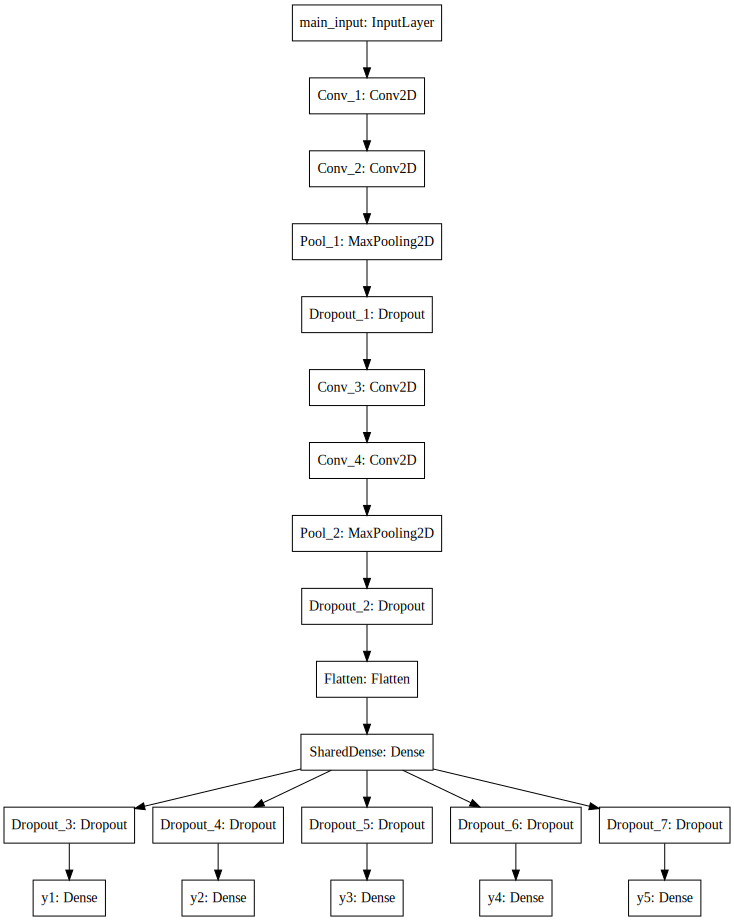

In [52]:
#from keras.utils.visualize_util import plot, model_to_dot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
# TODO: 可视化你的模型
SVG(model_to_dot(create_digit_recognition_model()).create(prog='dot', format='svg'))

### 问题 3
_你最终的模型架构是什么样的？（什么类型的模型，层数，大小, 如何连接等）_

**回答：**
#### 0. main_input：输入层，大小[28, 140, 1]
#### 1. Conv_1:卷积层，大小[28,140,32]，共有32个卷积核，每个卷积核大小[3,3,1]，每个卷积核对上一层进行卷积运算，生成一层卷积层
#### 2. Conv_2:卷积层，大小[28,140,32]，共有32个卷积核，每个卷积核大小[3,3,32]，每个卷积核对对上一层进行卷积运算，生成一层卷积层
#### 3. Pool_1: 池化层，大小[14,70,32]，池化核大小[2,2]，对上一层神经网络中每一层运用池化核进行池化
#### 4. Dropout_1:Dropout层，对上一层神经元25%进行随机失活

#### 5. Conv_3:卷积层，大小[14,70,64]，共有64个卷积核，每个卷积核大小[3,3,64]，每个卷积核对上一层进行卷积运算，生成一层卷积层
#### 6. Conv_4:卷积层，大小[14,70,64]，共有64个卷积核，每个卷积核大小[3,3,64]，每个卷积核对上一层进行卷积运算，生成一层卷积层
#### 7. Pool_2: 池化层，大小[7,35,64]，池化核大小[2,2]，对上一层神经网络中每一层运用池化核进行池化
#### 8. Dropout_2:Dropout层，对上一层神经元25%进行随机失活

#### 9. Flatten:将上一层神经网络展开成一维，长度为7X35X64=15680
#### 10. SharedDense:全连接层，长度为256

#### 10. Dropout_3: Dropout层，对上一层神经元25%进行随机失活
#### 11. y1: 带有softmax的全连接层分类器，大小为[1,11]，用来预测第1个字符

#### 12. Dropout_4: Dropout层，对上一层神经元25%进行随机失活
#### 13. y2: 带有softmax的全连接层分类器，大小为[1,11]，用来预测第2个字符

#### 14. Dropout_5: Dropout层，对上一层神经元25%进行随机失活
#### 15. y3: 带有softmax的全连接层分类器，大小为[1,11]，用来预测第3个字符

#### 16. Dropout_6: Dropout层，对上一层神经元25%进行随机失活
#### 17. y4: 带有softmax的全连接层分类器，大小为[1,11]，用来预测第4个字符

#### 18. Dropout_7: Dropout层，对上一层神经元25%进行随机失活
#### 19. y5: 带有softmax的全连接层分类器，大小为[1,11]，用来预测第5个字符


### 练习：训练你的网络模型

训练你的模型时，需要设置训练集和验证集。

In [101]:
# TODO: 训练你的模型
model_1=create_digit_recognition_model()
model_1.fit( 
    {'main_input':X_train},
    {'y1':y_train[0],
     'y2':y_train[1],
     'y3':y_train[2],
     'y4':y_train[3],
     'y5':y_train[4]},
    validation_data=({'main_input':X_valid},
    {'y1':y_valid[0],
     'y2':y_valid[1],
     'y3':y_valid[2],
     'y4':y_valid[3],
     'y5':y_valid[4]}),
    
    epochs=10, batch_size=512
    )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 508s - loss: 9.8197 - y1_loss: 2.6949 - y2_loss: 2.3883 - y3_loss: 2.0502 - y4_loss: 1.5818 - y5_loss: 1.1046 - val_loss: 1.1792 - val_y1_loss: 0.3215 - val_y2_loss: 0.2656 - val_y3_loss: 0.2256 - val_y4_loss: 0.1935 - val_y5_loss: 0.1730
Epoch 2/10
48000/48000 [==============================] - 559s - loss: 1.3324 - y1_loss: 0.3815 - y2_loss: 0.3128 - y3_loss: 0.2619 - y4_loss: 0.2091 - y5_loss: 0.1670 - val_loss: 0.3847 - val_y1_loss: 0.1156 - val_y2_loss: 0.0933 - val_y3_loss: 0.0728 - val_y4_loss: 0.0586 - val_y5_loss: 0.0444
Epoch 3/10
48000/48000 [==============================] - 547s - loss: 0.7477 - y1_loss: 0.2149 - y2_loss: 0.1852 - y3_loss: 0.1497 - y4_loss: 0.1123 - y5_loss: 0.0858 - val_loss: 0.2914 - val_y1_loss: 0.0845 - val_y2_loss: 0.0723 - val_y3_loss: 0.0600 - val_y4_loss: 0.0449 - val_y5_loss: 0.0296
Epoch 4/10
48000/48000 [==============================] - 5

### 练习：计算你的模型准确率

我们刚才得到了模型每个数字的准确率，现在让我们来计算整体准确率，按照完全预测正确数字序列的标准来计算。

比如 1,2,3,10,10 预测成了 1,2,10,10,10 算错，而不是算对了80%。

In [114]:
def evaluate(model,x=X_test,y=y_test):
    # TODO: 按照错一个就算错的规则计算准确率
    # 1. 使用model对x进行预测，得到y_pred
    num_test=y[0].shape[0]

    y_pred=model.predict(x)
    
    # 2. 得到正确预算数量num_right
    result=np.ones(num_test)
    for i in range(n_len):
        result=np.logical_and(
            np.equal(np.argmax(y_pred[i],axis=1),np.argmax(y[i],axis=1)),result)
    num_right=np.sum(result)
    # 3. 输出结果
    print '一共预测{:.0f}组序列'.format(num_test),'正确预测{:.0f}组序列'.format(num_right),'整体准确率为{:.2f}%组序列'.format(100.0*num_right/num_test)    
        

evaluate(model_1)

一共预测10000组序列 正确预测9624组序列 整体准确率为96.24%组序列


### 问题 4

_你的模型准确率有多少？你觉得你的模型足以解决问题吗？_

**回答：**
模型预测的整体准确率为96.24%。 模型足以解决问题。

### 预测值可视化

我们将模型的预测结果和真实值画出来，观察真实效果。

(-0.5, 139.5, 27.5, -0.5)

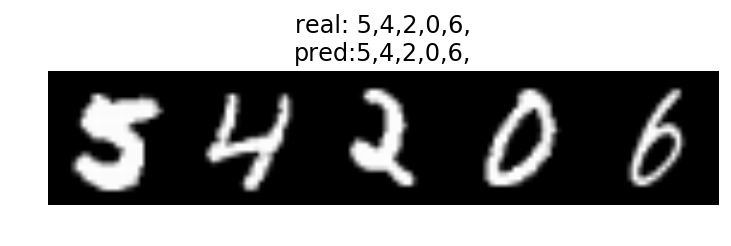

In [112]:
def get_result(result):
    # 将 one_hot 编码解码
    resultstr = ''
    for i in range(n_len):
        resultstr += str(np.argmax(result[i])) + ','
    return resultstr

index = random.randint(0, n_test-1)
y_pred = model_1.predict(X_test[index].reshape(1, height, width*n_len, 1))

plt.title('real: %s\npred:%s'%(get_result([y_test[x][index] for x in range(n_len)]), get_result(y_pred)))
plt.imshow(X_test[index,:,:,0], cmap='gray')
plt.axis('off')

### 保存模型

模型达到满意的效果以后，我们需要将模型的权值和结构保存，以便下次调用。

In [107]:
model_1.save_weights('model.h5')
with open('model.json', 'w') as f:
    f.write(model_1.to_json())